## STA 141B 
### Homework 3

### Your Name: Sungwon Lee

Submit this ipynb to canvas; also print your completed ipynb to pdf and submit it on gradescope.  Work in between the exercise cells and be clear about your answers.  For example, you should add cells below the cell starting with 1.1 for the answer to 1.1.  You can break your answers into as many cells as you like.  Please do not clear your output so that we can see your answers without running all of the cells.

Throughout this homework we will be using the the covidcast api, and you can find [the documentation here](https://cmu-delphi.github.io/delphi-epidata/).  We will be using the http api and you should not use the `covidcast` python package.  Even though it is available, I want to test you on using the requests package and making http requests directly.

In [1]:
import requests
import pandas as pd
import numpy as np
import sqlalchemy as sqla
import requests_cache
import plotnine as p9
requests_cache.install_cache('covidcast_cache')

Read [the documentation about the Epidata API at this README](https://cmu-delphi.github.io/delphi-epidata/api/covidcast.html) and we will be using the covidcast "endpoint".  Pay special attention to the section "Constructing API Queries".  You will be making requests with the request package.  Consider the following get request...
```
https://api.covidcast.cmu.edu/epidata/api.php?endpoint=covidcast&data_source=fb-survey&signal=smoothed_cli&time_type=day&geo_type=county&time_values=20200406-20200410&geo_value=06001
```
If you put this in your browser you see...
```
{ "epidata": [{"geo_value":"06001","signal":"smoothed_cli","time_value":20200406,"direction":null,"issue":20200903,"lag":150,"value":0.0,"stderr":0.3691187,"sample_size":133.079},{"geo_value":"06001","signal":"smoothed_cli","time_value":20200407,"direction":null,"issue":20200903,"lag":149,"value":0.7510297,"stderr":0.3720838,"sample_size":422.8531},{"geo_value":"06001","signal":"smoothed_cli","time_value":20200408,"direction":null,"issue":20200903,"lag":148,"value":0.6378432,"stderr":0.2732424,"sample_size":685.658},{"geo_value":"06001","signal":"smoothed_cli","time_value":20200409,"direction":null,"issue":20200903,"lag":147,"value":0.6162563,"stderr":0.2433975,"sample_size":871.1857},{"geo_value":"06001","signal":"smoothed_cli","time_value":20200410,"direction":null,"issue":20200903,"lag":146,"value":0.7180705,"stderr":0.2483399,"sample_size":979.2376}], "result": 1, "message": "success" }
```
which is the json returned from this query.  The parameters for the query are 
```
endpoint=covidcast
data_source=fb-survey
signal=smoothed_cli
time_type=day
geo_type=county
time_values=20200406-20200410
geo_value=06001
```
which asks for the smoothed cli signal from the fb survey data for county 06001 from 2020-04-06 to 2020-04-10.  Notice that if you want to select all geo_values then you can set geo_value=*.

**Exercise 1.** Request the value for the smoothed_cli signal from the fb-survey datasource on 2020-10-01 for ALL STATES.  Notice that the above is for counties and so you need to change this to states.  Do the same for smoothed_hh_cmnty_cli signal from the fb-survey data, and the confirmed_7dav_incidence_prop signal from the jhu-csse data source.  Create dataframes from these and join these 3 variables based on the state into a single dataframe.  Drop rows with missingness (there should be only about 5 of them dropped this way, corresponding to the US territories).  Finally, compute and output the spearman correlation between all variables in this dataframe (there should be 51 rows in the new dataset). 

In [2]:
url = 'https://api.covidcast.cmu.edu/epidata/covidcast/'

In [3]:
# api for smoothed_cli signal

smooth_cli_params = {'data_source': 'fb-survey', 'signal': 'smoothed_cli', 'time_type': 'day', 
          'geo_type': 'state', 'time_values': '20201001', 'geo_values': '*' }

In [4]:
smoothcli_req = requests.get(url, params=smooth_cli_params)

smcli = smoothcli_req.json()

smcli.__repr__()[0:]

smcli.keys()

dict_keys(['epidata', 'result', 'message'])

In [5]:
smcli_df = pd.DataFrame.from_dict(smcli['epidata'][i] for i in range(len(smcli['epidata'])))

smcli_df.head()

,geo_value,signal,source,geo_type,time_type,time_value,direction,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size
0,ak,smoothed_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,1.585416,0.429257,760.0000
1,al,smoothed_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,0.983292,0.140617,3742.0925
2,ar,smoothed_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,1.057655,0.173559,2586.9222
3,az,smoothed_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,0.597376,0.090456,5681.9867
4,ca,smoothed_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,0.450001,0.039909,21930.1313


In [6]:
# api for smoothed_hh_cmnty_cli signal


smoothed_hh_cmnty_cli_params = {'data_source': 'fb-survey', 'signal': 'smoothed_hh_cmnty_cli', 'time_type': 'day', 
          'geo_type': 'state', 'time_values': '20201001', 'geo_values': '*' }

smoothed_hh_req = requests.get(url, params=smoothed_hh_cmnty_cli_params)

smoothed_hh_req.json()

smhh = smoothed_hh_req.json()

smhh.keys()

dict_keys(['epidata', 'result', 'message'])

In [7]:
smhh_df = pd.DataFrame.from_dict(smhh['epidata'][i] for i in range(len(smhh['epidata'])))

smhh_df.head()

,geo_value,signal,source,geo_type,time_type,time_value,direction,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size
0,ak,smoothed_hh_cmnty_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,24.618585,1.605452,720.0000
1,al,smoothed_hh_cmnty_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,25.393981,0.736774,3490.0847
2,ar,smoothed_hh_cmnty_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,29.244671,0.927004,2407.9216
3,az,smoothed_hh_cmnty_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,16.585878,0.508349,5353.6945
4,ca,smoothed_hh_cmnty_cli,fb-survey,state,day,20201001,None,20201119,49,0,0,0,13.689740,0.242334,20120.1215


In [8]:
# api for confirmed_7dav_incidence_prop signal / data_source : jhu-csse


confirmed_7dav_params = {'data_source': 'jhu-csse', 'signal': 'confirmed_7dav_incidence_prop', 'time_type': 'day', 
          'geo_type': 'state', 'time_values': '20201001', 'geo_values': '*' }

confirmed_7days_req = requests.get(url, params=confirmed_7dav_params)

con7 = confirmed_7days_req.json()

In [9]:
con7_df = pd.DataFrame.from_dict(con7['epidata'][i] for i in range(len(con7['epidata'])))

con7_df.head()

,geo_value,signal,source,geo_type,time_type,time_value,direction,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size
0,ak,confirmed_7dav_incidence_prop,jhu-csse,state,day,20201001,None,20210403,184,0,0,0,16.640941,None,None
1,al,confirmed_7dav_incidence_prop,jhu-csse,state,day,20201001,None,20210401,182,0,0,0,18.763031,None,None
2,ar,confirmed_7dav_incidence_prop,jhu-csse,state,day,20201001,None,20210401,182,0,0,0,27.208891,None,None
3,as,confirmed_7dav_incidence_prop,jhu-csse,state,day,20201001,None,20201002,1,0,0,0,0.000000,None,None
4,az,confirmed_7dav_incidence_prop,jhu-csse,state,day,20201001,None,20210401,182,0,0,0,6.467782,None,None


In [10]:
smcli_df_n = smcli_df.rename(columns={'signal':'signal_smcli', 'source' : 'source_smcli', 'geo_type' : 'geo_type_smcli', 'time_type' : 'time_type_smcli',
                          'time_value' : 'time_value_smcli', 'direction' : 'direction_smcli', 'issue' : 'issue_smcli', 'lag' : 'lag_smcli',
                          'missing_value' : 'missing_value_smcli','missing_stderr' : 'missing_stderr_smcli',
                          'missing_sample_size' : 'missing_sample_size_smcli', 'value' : 'value_smcli', 'stderr' : 'stderr_smcli', 
                          'sample_size' : 'sample_size_smcli'})

smhh_df_n = smhh_df.rename(columns={'signal':'signal_smhh', 'source' : 'source_smhh', 'geo_type' : 'geo_type_smhh', 'time_type' : 'time_type_smhh',
                          'time_value' : 'time_value_smhh', 'direction' : 'direction_smhh', 'issue' : 'issue_smhh', 'lag' : 'lag_smhh',
                          'missing_value' : 'missing_value_smhh','missing_stderr' : 'missing_stderr_smhh',
                          'missing_sample_size' : 'missing_sample_size_smhh', 'value' : 'value_smhh', 'stderr' : 'stderr_smhh', 
                          'sample_size' : 'sample_size_smhh'})

con7_df_n = con7_df.rename(columns={'signal':'signal_con7', 'source' : 'source_con7', 'geo_type' : 'geo_type_con7', 'time_type' : 'time_type_con7',
                          'time_value' : 'time_value_con7', 'direction' : 'direction_con7', 'issue' : 'issue_con7', 'lag' : 'lag_con7',
                          'missing_value' : 'missing_value_con7','missing_stderr' : 'missing_stderr_con7',
                          'missing_sample_size' : 'missing_sample_size_con7', 'value' : 'value_con7', 'stderr' : 'stderr_con7', 
                          'sample_size' : 'sample_size_con7'})

In [11]:
smcli_df_n.set_index('geo_value',inplace=True)
smhh_df_n.set_index('geo_value',inplace=True)
con7_df_n.set_index('geo_value',inplace=True)

In [12]:
combined_df = smcli_df_n.join([smhh_df_n, con7_df_n])

In [13]:
A = combined_df.corr(method ='spearman')

In [14]:
A.dropna(how='all', inplace=True)

In [15]:
A.dropna(axis=1, how='all', inplace=True)

In [16]:
A

,value_smcli,stderr_smcli,sample_size_smcli,value_smhh,stderr_smhh,sample_size_smhh,issue_con7,lag_con7,missing_stderr_con7,missing_sample_size_con7,value_con7
value_smcli,1.000000,0.598009,-0.284525,0.859276,0.460362,-0.282805,0.146663,0.146663,-0.171566,-0.171566,0.768778
stderr_smcli,0.598009,1.000000,-0.894208,0.425158,0.945068,-0.893394,-0.256415,-0.256415,-0.322544,-0.322544,0.409050
sample_size_smcli,-0.284525,-0.894208,1.000000,-0.141357,-0.963167,0.999367,0.322598,0.322598,0.315681,0.315681,-0.173122
value_smhh,0.859276,0.425158,-0.141357,1.000000,0.358371,-0.136923,0.116937,0.116937,-0.185291,-0.185291,0.936742
stderr_smhh,0.460362,0.945068,-0.963167,0.358371,1.000000,-0.961810,-0.281980,-0.281980,-0.315681,-0.315681,0.384253
sample_size_smhh,-0.282805,-0.893394,0.999367,-0.136923,-0.961810,1.000000,0.326229,0.326229,0.315681,0.315681,-0.169864
issue_con7,0.146663,-0.256415,0.322598,0.116937,-0.281980,0.326229,1.000000,1.000000,0.562111,0.562111,0.057485
lag_con7,0.146663,-0.256415,0.322598,0.116937,-0.281980,0.326229,1.000000,1.000000,0.562111,0.562111,0.057485
missing_stderr_con7,-0.171566,-0.322544,0.315681,-0.185291,-0.315681,0.315681,0.562111,0.562111,1.000000,1.000000,-0.185291
missing_sample_size_con7,-0.171566,-0.322544,0.315681,-0.185291,-0.315681,0.315681,0.562111,0.562111,1.000000,1.000000,-0.185291


**Exercise 2.** Create and engine using sqlalchemy for a sqlite database (you can just use for example `covid.sqlite` as your location in your current directory).  You will sequentially pull these three variables above for each state at different dates  and write the resulting dataframes to a single table in the sqlite database.  Your date range should be from '2020-08-02' to '2021-11-01' at a frequency of every 7 days.  For each date, query the API for the three variables and construct the dataframe of each state at that date.  Then append this dataframe to a table (call the table "state") in the sqlite database that you created, using DataFrame.to_sql command.  Finally, make a sql query to this table that counts the number of rows in the state table, there should be 51 x the number of dates in your date range.

In [17]:
from datetime import timedelta, date

def daterange(start_date, end_date):
     for n in range(0, int((end_date - start_date).days) + 1, 7):
         yield start_date + timedelta(n)

day = []
        
start_dt = date(2020, 8, 2)
end_dt = date(2021, 11, 1)
for dt in daterange(start_dt, end_dt):
    day.append(dt.strftime("%Y%m%d"))

In [18]:
# smoothed_cli ==> dataframe for every 7days 

lst_smcli = []

for i in range(len(day)):
    url_smcli = 'https://api.covidcast.cmu.edu/epidata/api.php?endpoint=covidcast&data_source=fb-survey&signal=smoothed_cli&time_type=day&geo_type=state&time_values='+day[i]+'&geo_value=*'
    
    smcli_req = requests.get(url_smcli)
    smcli  = smcli_req.json()
    
    smcli_df = pd.DataFrame.from_dict(smcli['epidata'][j] for j in range(len(smcli['epidata'])))
    lst_smcli.append(smcli_df)

    
smcli_tot_df = pd.concat(lst_smcli)

In [86]:
smcli_tot_df

,geo_value,signal,time_value,direction,issue,lag,missing_value,missing_stderr,missing_sample_size,value,stderr,sample_size
0,ak,smoothed_cli,20200802,None,20200903,32,0,0,0,0.707115,0.223405,1295.0000
1,al,smoothed_cli,20200802,None,20200903,32,0,0,0,1.073778,0.107102,6657.1384
2,ar,smoothed_cli,20200802,None,20200903,32,0,0,0,0.783407,0.112551,4175.9493
3,az,smoothed_cli,20200802,None,20200903,32,0,0,0,0.523663,0.064633,9192.7410
4,ca,smoothed_cli,20200802,None,20200903,32,0,0,0,0.632992,0.035132,38084.3713
...,...,...,...,...,...,...,...,...,...,...,...,...
46,vt,smoothed_cli,20211031,None,20211105,5,0,0,0,1.083317,0.393430,531.0012
47,wa,smoothed_cli,20211031,None,20211105,5,0,0,0,0.946646,0.123218,4727.9725
48,wi,smoothed_cli,20211031,None,20211105,5,0,0,0,1.434490,0.176019,3732.9774
49,wv,smoothed_cli,20211031,None,20211105,5,0,0,0,1.802920,0.289360,1583.0542


In [19]:
# smoothed_hh_cmnty_cli ==> dataframe for every 7days 

lst_smhh = []

for i in range(len(day)):
    url_smhh = 'https://api.covidcast.cmu.edu/epidata/api.php?endpoint=covidcast&data_source=fb-survey&signal=smoothed_hh_cmnty_cli&time_type=day&geo_type=state&time_values='+day[i]+'&geo_value=*'
    
    smhh_req = requests.get(url_smhh)
    smhh  = smhh_req.json()
    
    smhh_df = pd.DataFrame.from_dict(smhh['epidata'][j] for j in range(len(smhh['epidata'])))
    lst_smhh.append(smhh_df)

    
smhh_tot_df = pd.concat(lst_smhh)

In [20]:
# confirmed_7dav_incidence_prop ==> dataframe for every 7days 

lst_con7 = []

for i in range(len(day)):
    url_con7 = 'https://api.covidcast.cmu.edu/epidata/api.php?endpoint=covidcast&data_source=jhu-csse&signal=confirmed_7dav_incidence_prop&time_type=day&geo_type=state&time_values='+day[i]+'&geo_value=*'
    
    con7_req = requests.get(url_con7)
    con7 = con7_req.json()
    
    con7_df = pd.DataFrame.from_dict(con7['epidata'][j] for j in range(len(con7['epidata'])))
    lst_con7.append(con7_df)

    
con7_tot_df = pd.concat(lst_con7)

In [21]:

smcli_tot_df_n = smcli_tot_df.rename(columns={'signal':'signal_smcli', 'source' : 'source_smcli', 'geo_type' : 'geo_type_smcli', 'time_type' : 'time_type_smcli',
                          'time_value' : 'time_value_smcli', 'direction' : 'direction_smcli', 'issue' : 'issue_smcli', 'lag' : 'lag_smcli',
                          'missing_value' : 'missing_value_smcli','missing_stderr' : 'missing_stderr_smcli',
                          'missing_sample_size' : 'missing_sample_size_smcli', 'value' : 'value_smcli', 'stderr' : 'stderr_smcli', 
                          'sample_size' : 'sample_size_smcli'})

smhh_tot_df_n = smhh_tot_df.rename(columns={'signal':'signal_smhh', 'source' : 'source_smhh', 'geo_type' : 'geo_type_smhh', 'time_type' : 'time_type_smhh',
                          'time_value' : 'time_value_smhh', 'direction' : 'direction_smhh', 'issue' : 'issue_smhh', 'lag' : 'lag_smhh',
                          'missing_value' : 'missing_value_smhh','missing_stderr' : 'missing_stderr_smhh',
                          'missing_sample_size' : 'missing_sample_size_smhh', 'value' : 'value_smhh', 'stderr' : 'stderr_smhh', 
                          'sample_size' : 'sample_size_smhh'})

con7_tot_df_n = con7_tot_df.rename(columns={'signal':'signal_con7', 'source' : 'source_con7', 'geo_type' : 'geo_type_con7', 'time_type' : 'time_type_con7',
                          'time_value' : 'time_value_con7', 'direction' : 'direction_con7', 'issue' : 'issue_con7', 'lag' : 'lag_con7',
                          'missing_value' : 'missing_value_con7','missing_stderr' : 'missing_stderr_con7',
                          'missing_sample_size' : 'missing_sample_size_con7', 'value' : 'value_con7', 'stderr' : 'stderr_con7', 
                          'sample_size' : 'sample_size_con7'})



smcli_tot_df_n.reset_index(drop=True, inplace=True)
smhh_tot_df_n.reset_index(drop=True, inplace=True)
con7_tot_df_n.reset_index(drop=True, inplace=True)

In [22]:
smcli_tot_df_n.drop(smcli_tot_df_n[smcli_tot_df_n['geo_value'] == 'pr'].index,inplace=True)
smhh_tot_df_n.drop(smhh_tot_df_n[smhh_tot_df_n['geo_value'] == 'pr'].index,inplace=True)

In [23]:
A = smcli_tot_df_n.set_index('geo_value')
B = smhh_tot_df_n.set_index('geo_value')
C = con7_tot_df_n.set_index('geo_value')
AB = pd.concat([A,B], axis=1, sort=False)

row_lst = []
for i in smcli_df['geo_value']:
    row_lst.append(i)
    
row_lst2 = []
for i in C.index:
    row_lst2.append(i)
    
difference = set(row_lst).symmetric_difference(set(row_lst2))
difference = list(difference)

C = C.loc[~C.index.isin(difference)]

In [24]:
combined_tot = pd.concat([AB,C], axis=1, sort=False)

In [25]:
from sqlalchemy import create_engine
import sqlalchemy as sqla

combined_conn = sqla.create_engine('sqlite:///covid.sqlite')


combined_tot.to_sql('state', combined_conn, if_exists='replace')


In [26]:
# Number of rows total in state table (sql)

pd.read_sql_query("select count(*) from state", combined_conn)

,count(*)
0,3366


**Exercise 3.** Using `read_sql_query`, select all variables where the state is california from the state table, and read it into a pandas dataframe.  Filtering out CA should be done in SQL and then the pd.DataFrame should be constructed, the filter should not happen after you read in the full data.  In the end you should have one row for each date.  

For the two FB indicator variables, produce a plot comparing that to the death indicences.  Plot the FB indicator variables as a time series in a secondary y axis and the death indicence as the primary y axis.  You can just use pd.DataFrame.plot().  You should have the actual date on the X axis and not just an index number.  Remark on which indicator looks more variable and why they are good "leading indicators".  A leading indicator is a variable that rises and falls before the indicator of interest such as covid deaths.

In [27]:
CA_df = pd.read_sql_query("select * from state where geo_value = 'ca'" , combined_conn)

In [28]:
CA_df

,geo_value,signal_smcli,time_value_smcli,direction_smcli,issue_smcli,lag_smcli,missing_value_smcli,missing_stderr_smcli,missing_sample_size_smcli,value_smcli,...,time_value_con7,direction_con7,issue_con7,lag_con7,missing_value_con7,missing_stderr_con7,missing_sample_size_con7,value_con7,stderr_con7,sample_size_con7
0,ca,smoothed_cli,20200802,None,20200903,32,0,0,0,0.632992,...,20200802,None,20211113,468,0,5,5,20.644718,None,None
1,ca,smoothed_cli,20200809,None,20200903,25,0,0,0,0.585508,...,20200809,None,20211113,461,0,5,5,17.472822,None,None
2,ca,smoothed_cli,20200816,None,20200903,18,0,0,0,0.544658,...,20200816,None,20211113,454,0,5,5,23.339795,None,None
3,ca,smoothed_cli,20200823,None,20200903,11,0,0,0,0.493013,...,20200823,None,20211113,447,0,5,5,14.791534,None,None
4,ca,smoothed_cli,20200830,None,20201119,81,0,0,0,0.387622,...,20200830,None,20211113,440,0,5,5,12.843255,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,ca,smoothed_cli,20211003,None,20211008,5,0,0,0,1.025760,...,20211003,None,20211113,41,0,5,5,17.906459,None,None
62,ca,smoothed_cli,20211010,None,20211015,5,0,0,0,0.950833,...,20211010,None,20211113,34,0,5,5,14.884794,None,None
63,ca,smoothed_cli,20211017,None,20211022,5,0,0,0,0.803861,...,20211017,None,20211113,27,0,5,5,13.668072,None,None
64,ca,smoothed_cli,20211024,None,20211029,5,0,0,0,1.020906,...,20211024,None,20211113,20,0,5,5,10.080684,None,None


In [29]:
# smooth_cli : COVID-Like Symptoms
# smooth_hh_cmnty_cli : COVID-Like Symptoms in Community
# confirmed_7dav_incidence_prop : Cases per 100,000 People

import matplotlib.pyplot as plt

CA_df[['time_value_smcli', 'issue_smcli','lag_smcli', 'value_smcli',
      'time_value_smhh','issue_smcli', 'lag_smcli', 'value_smhh',
      'time_value_con7', 'issue_con7','lag_con7', 'value_con7']]

,time_value_smcli,issue_smcli,lag_smcli,value_smcli,time_value_smhh,issue_smcli,lag_smcli,value_smhh,time_value_con7,issue_con7,lag_con7,value_con7
0,20200802,20200903,32,0.632992,20200802,20200903,32,20.722805,20200802,20211113,468,20.644718
1,20200809,20200903,25,0.585508,20200809,20200903,25,19.452885,20200809,20211113,461,17.472822
2,20200816,20200903,18,0.544658,20200816,20200903,18,18.001714,20200816,20211113,454,23.339795
3,20200823,20200903,11,0.493013,20200823,20200903,11,16.526177,20200823,20211113,447,14.791534
4,20200830,20201119,81,0.387622,20200830,20201119,81,15.335234,20200830,20211113,440,12.843255
...,...,...,...,...,...,...,...,...,...,...,...,...
61,20211003,20211008,5,1.025760,20211003,20211008,5,15.127916,20211003,20211113,41,17.906459
62,20211010,20211015,5,0.950833,20211010,20211015,5,14.542635,20211010,20211113,34,14.884794
63,20211017,20211022,5,0.803861,20211017,20211022,5,13.853707,20211017,20211113,27,13.668072
64,20211024,20211029,5,1.020906,20211024,20211029,5,14.350699,20211024,20211113,20,10.080684


In [30]:
CA_df['time_value_smcli'] = pd.to_datetime(CA_df['time_value_smcli'],format='%Y%m%d')
CA_df['time_value_smhh'] = pd.to_datetime(CA_df['time_value_smhh'],format='%Y%m%d')
CA_df['time_value_con7'] = pd.to_datetime(CA_df['time_value_con7'],format='%Y%m%d')
CA_df['issue_smcli'] = pd.to_datetime(CA_df['issue_smcli'],format='%Y%m%d')
CA_df['issue_smhh'] = pd.to_datetime(CA_df['issue_smhh'],format='%Y%m%d')
CA_df['issue_con7'] = pd.to_datetime(CA_df['issue_con7'],format='%Y%m%d')

In [34]:
CA_df[['value_smcli','value_smhh','value_con7']].describe()

,value_smcli,value_smhh,value_con7
count,66.000000,66.000000,66.000000
mean,0.735004,16.057523,24.539989
std,0.258101,6.212961,27.918370
min,0.387622,7.377266,1.005165
25%,0.530021,11.578685,8.003312
50%,0.630900,14.930156,14.229803
75%,0.962807,19.252738,28.491176
max,1.323246,31.142245,115.274324


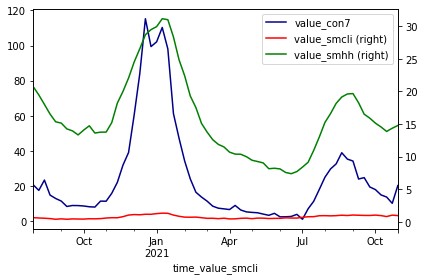

In [35]:
ax = CA_df.plot(kind='line', x='time_value_smcli', y='value_con7', color='DarkBlue')

ax2=CA_df.plot(kind='line', x='time_value_smcli', y=['value_smcli', 'value_smhh'], secondary_y=True,color=['Red','Green'], ax=ax)

plt.tight_layout()
plt.show()


In [36]:
# normalized_df=(df-df.mean())/df.std()

CA_df_norm = CA_df

In [37]:
CA_df_norm['value_smcli'] = (CA_df_norm['value_smcli'] - CA_df_norm['value_smcli'].mean())/CA_df_norm['value_smcli'].std()

In [38]:
CA_df_norm['value_smhh'] = (CA_df_norm['value_smhh'] - CA_df_norm['value_smhh'].mean())/CA_df_norm['value_smhh'].std()
CA_df_norm['value_con7'] = (CA_df_norm['value_con7'] - CA_df_norm['value_con7'].mean())/CA_df_norm['value_con7'].std()

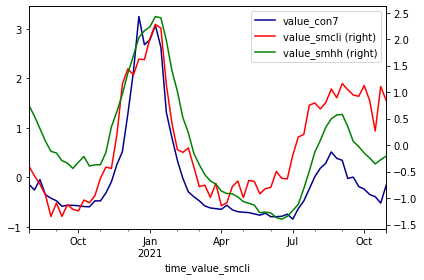

In [39]:
ax = CA_df_norm.plot(kind='line', x='time_value_smcli', y='value_con7', color='DarkBlue')

ax2=CA_df_norm.plot(kind='line', x='time_value_smcli', y=['value_smcli', 'value_smhh'], secondary_y=True,color=['Red','Green'], ax=ax)

plt.tight_layout()
plt.show()


**Exercise 4.** Using read_sql_query, for each variable compute the average of all states grouped by date.  Read it into a pandas dataframe.  The averaging should be done in SQL and then the pd.DataFrame should be constructed, the average should not happen after you read in the full data. In the end you should have one row for each date.  The rest of this is identical to the previous exercise...

For the two FB indicator variables, produce a plot comparing that to the death indicences. Plot the FB indicator variables as a time series in a secondary y axis and the death indicence as the primary y axis. You can just use pd.DataFrame.plot(). You should have the actual date on the X axis and not just an index number.

In [40]:
sql_query = """
SELECT time_value_smcli as DATE, avg(value_smcli) as smoothed_cli,avg(value_smhh) as smoothed_cmnty_cli, avg(value_con7) as confirmed_incidence 
FROM state 
GROUP BY time_value_smcli, time_value_smhh, time_value_con7"""

pd.read_sql_query(sql_query, combined_conn )

,DATE,smoothed_cli,smoothed_cmnty_cli,confirmed_incidence
0,20200802,0.574020,21.953618,15.915165
1,20200809,0.553214,21.510479,14.169415
2,20200816,0.531083,20.494328,12.775469
3,20200823,0.585938,19.913992,11.864382
4,20200830,0.589086,19.860055,13.037337
...,...,...,...,...
61,20211003,1.437019,22.451489,40.638336
62,20211010,1.426947,21.640540,36.076048
63,20211017,1.322472,20.870089,32.881530
64,20211024,1.269287,20.645673,29.769561


**Exercise 5** The Pearson correlation between variables a and b can be computed from 5 quantities...
```
n = count of rows
cross = sum(a * b)
sqr_1 = sum(a * a)
sqr_2 = sum(b * b)
mu_1 = avg(a)
mu_2 = avg(b)
```
using the following equation
```
(cross - n*mu_1*mu_2) / ((sqr_1 - n*mu_1**2) * (sqr_2 - n*mu_2**2))**0.5
```
Using only SQL commands, compute these quantities for variables smoothed_hh_cmnty_cli and smoothed_cli and grouped by date, reading this into a DataFrame.  Compute the Pearson correlation for each date using these quantities, and plot the time series of pearson correlation. 

In [80]:

sqlm = """
SELECT time_value_smcli as DATE, count(*) as n, sum(value_smcli * value_smhh) as cross, sum(value_smcli * value_smcli) as sqr_1, sum(value_smhh * value_smhh) as sqr_2, avg(value_smcli) as mu_1, avg(value_smhh) as mu_2
FROM state 
GROUP BY time_value_smcli, time_value_smhh, time_value_con7
"""





PC_df = pd.read_sql_query(sqlm, combined_conn)

In [81]:
PC_df['Pearson_Corr'] = (PC_df['cross'] - PC_df['n']*PC_df['mu_1']*PC_df['mu_2'])/((PC_df['sqr_1'] - PC_df['n']*PC_df['mu_1']**2) * (PC_df['sqr_2'] - PC_df['n']*PC_df['mu_2']**2))**0.5

In [82]:
PC_df['DATE'] = pd.to_datetime(PC_df['DATE'],format='%Y%m%d')

In [83]:
PC_df

,DATE,n,cross,sqr_1,sqr_2,mu_1,mu_2,Pearson_Corr
0,2020-08-02,51,728.738019,20.198575,27406.761105,0.574020,21.953618,0.878458
1,2020-08-09,51,680.666318,18.566663,26097.445373,0.553214,21.510479,0.857869
2,2020-08-16,51,621.989518,16.839664,23698.226133,0.531083,20.494328,0.894634
3,2020-08-23,51,666.420844,21.020592,22318.089812,0.585938,19.913992,0.832099
4,2020-08-30,51,667.706250,21.445257,22230.500342,0.589086,19.860055,0.798028
...,...,...,...,...,...,...,...,...
61,2021-10-03,51,1785.479387,118.382480,27815.001177,1.437019,22.451489,0.844003
62,2021-10-10,51,1710.256945,119.347296,25830.233433,1.426947,21.640540,0.779403
63,2021-10-17,51,1528.213551,102.726999,24188.487728,1.322472,20.870089,0.737789
64,2021-10-24,51,1443.177847,91.543754,23733.396199,1.269287,20.645673,0.780139


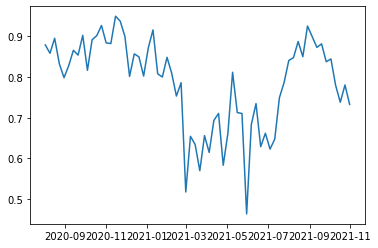

In [85]:
plt.plot('DATE','Pearson_Corr', data=PC_df);